In [66]:
# Building Decision Tree using ID3 Algorithm, With Pruning
# Author: Manas Trivedi, 181CO231

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Reading the dataset, setting class label
dataFrame = pd.read_csv("zoo.csv")
inputs = dataFrame.drop(columns = ["animal_name", "class_type"])
outputs = dataFrame["class_type"]

# Splitting dataset into training and testing data
trainingInputs, testingInputs, trainingOutputs, testingOutputs = train_test_split(inputs, outputs, test_size = 0.3)

# Creating the model with max_depth 5 for pre-pruning, followed by training the model
decisionTreeID3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
decisionTreeID3.fit(trainingInputs, trainingOutputs)

# Applying the model on the testing data and evaluating accuracy
predictedOutputs = decisionTreeID3.predict(testingInputs)
accuracy = accuracy_score(testingOutputs, predictedOutputs)
print('Accuracy of ID3: ' + str(accuracy * 100) + '%')

Accuracy of ID3: 93.54838709677419%


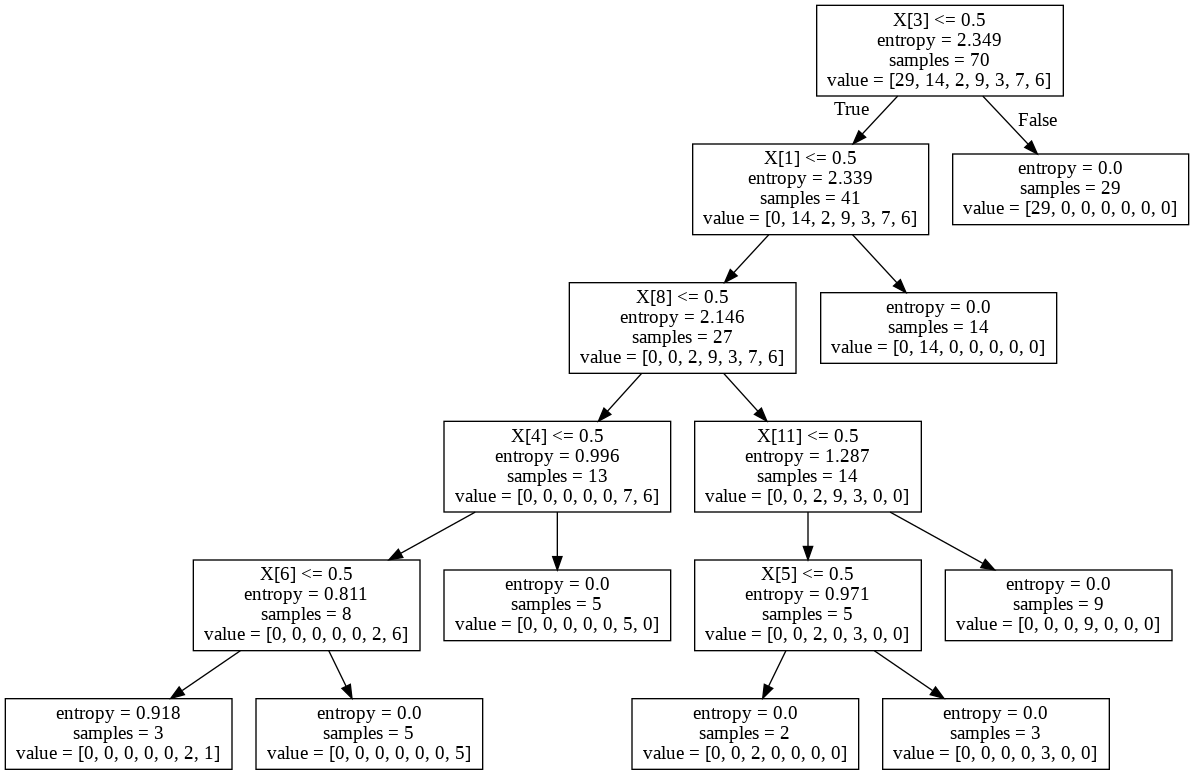

In [67]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decisionTreeID3, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())